Perceptron Learning Algorithm (PLA) is designed for binary classification problems with only two data layers.

Suppose there are two labeled classes illustrated in the figure below corresponding to the set of blue points and the set of red points. The problem is that from the data of two given labeled sets, build a classifier capable of predicting the label (color) of a new data point, such as a gray point.

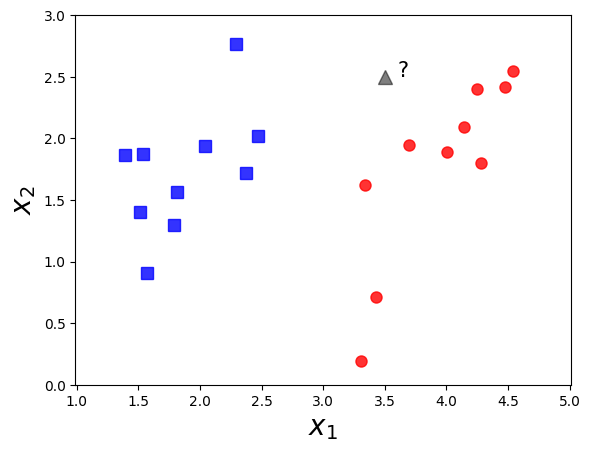

In [189]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(22)

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)

plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
plt.plot([3.5], [2.5], 'k^', markersize = 10, alpha = .5)
plt.text(3.6, 2.5, r'?', fontsize=15)
plt.axis('equal')
plt.ylim(0, 3)
plt.xlim(2, 4)

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)

plt.show()

The Perceptron problem is stated as follows: Given two labeled classes, find a straight line such that all points in class 1 lie on one side, all points in class 2 lie on the other side of the flat line with the assumption that there exists a flat line.

If there exists a straight line dividing two classes, we call those two classes *linear separation*. Classification algorithms that create boundaries as flat lines are collectively called Linear Classifiers.

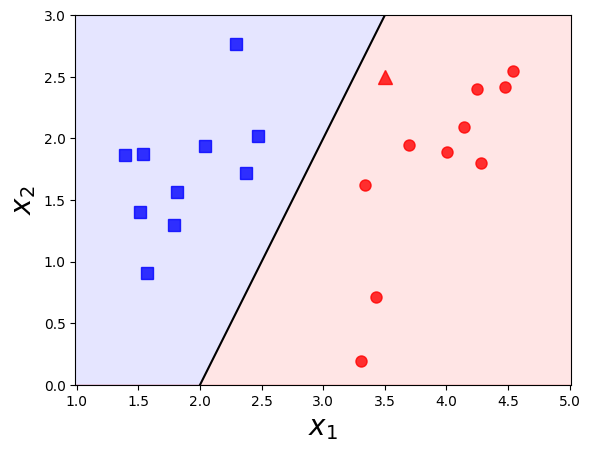

In [190]:
# plot points
plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
plt.plot([3.5], [2.5], 'r^', markersize = 10, alpha = .8)
plt.axis('equal')
# axis limits
plt.ylim(0, 3)
plt.xlim(2, 4)

# fill region colors
x1 = np.arange(-10, 10, .1)
y1 = 2 * x1 - 4
y2 = 10 * x1

plt.plot(x1, y1, 'k')
plt.fill_between(x1, y1, color='red', alpha=.1)
plt.fill_between(x1, y1, y2, color = 'blue', alpha=.1)

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)

plt.show()

## Perceptron algorithm

### Classification method of perceptron learning algorithm

Suppose $\mathbf{X} = [\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_N]\in\mathbb{R}^{d\times N}$ is matrix containing training data points where each column $\mathbf{x}_i$ is a data point in $d$ dimensional space; the labels corresponding to each data point are stored in a row vector $\mathbf{y} = [y_1, y_2, \ldots, y_N]\in\mathbb{R}^{1\times N}$, with $y_i = 1$ if $\mathbf{x}_i$ belongs to the first layer (blue square) and $y_i = −1$ if $\mathbf{x}_i $ belongs to the remaining class (red circle).

At one point, suppose we find a hyperplane boundary with the equation:

$$f_{\mathbf{w}}(\mathbf{x}) = w_1x_1 + w_2x_2 + \ldots + w_dx_d + w_0 = \mathbf{w}^T\mathbf{x} + w_0 = 0$$

where $\mathbf{w}\in\mathbb{R}^d$ is the coefficient vector and $w_0$ is the bias free term. By using the [bias trick](https://github.com/letruongzzio/Machine-Learning/blob/main/2%20-%20Linear%20Regression%20and%20Overfitting/Linear%20Regression.ipynb), we can consider the hyperplane equation as

$$f_{\mathbf{w}}(\mathbf{x}) = \mathbf{w}^T\mathbf{x}\tag{1}$$

with $\mathbf{x}$ here implicitly being the feature vector expands by one feature equal to $1$.

In two-dimensional space, suppose the straight line $w_1x_1 + w_2x_2 + w_0 = 0$ is the solution to be found as shown below. Note that points located on the same side of this line will make the function $f_{\mathbf{w}}(\mathbf{x})$ have the same sign. Just change the sign of $\mathbf{w}$ if necessary, we can assume that points located in the blue half-plane have a positive sign $(+)$, points in the red half-plane have a negative sign $(-)$. These signs are also equivalent to the label $\mathbf{y}$ of each class. So if $\mathbf{w}$ is a solution to the perceptron problem, with a new unlabeled data point $\mathbf{x}$, we can determine its label with a simple mathematical operation:

$$
\text{label}(\mathbf{x}) = 
\begin{cases} 
    1 & \text{if} \ \mathbf{w}^T\mathbf{x}\geq 0\\
    -1 & \text{o.w.}
\end{cases}
$$

More succinctly:

$$\text{label}(\mathbf{x}) = \text{sgn}(\mathbf{w}^T\mathbf{x})$$

where $\text{sgn}$ is the function that determines the sign, assuming that $\text{sgn}(0) = 1$.

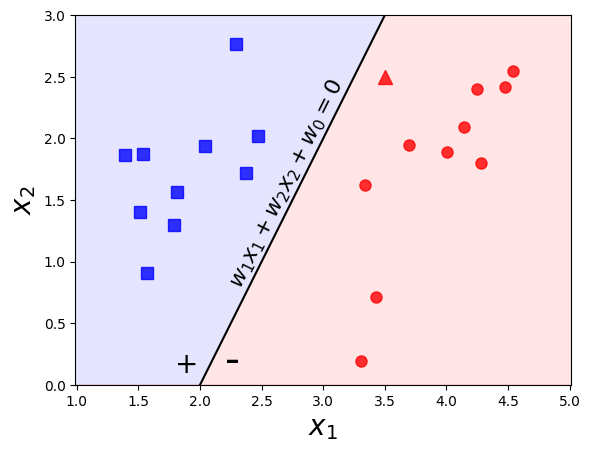

In [191]:
# plot points
plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
plt.plot([3.5], [2.5], 'r^', markersize = 10, alpha = .8)
plt.axis('equal')
# axis limits
plt.ylim(0, 3)
plt.xlim(2, 4)

# fill region colors
x1 = np.arange(-10, 10, .1)
y1 = 2 * x1 - 4
y2 = 10 * x1

plt.plot(x1, y1, 'k')
plt.fill_between(x1, y1, color='red', alpha=.1)
plt.fill_between(x1, y1, y2, color = 'blue', alpha=.1)

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)

plt.text(1.8, .1, r'+', fontsize=20)
plt.text(2.2, .1, r'-', fontsize=30)

plt.text(2.2, .8, r'$w_1x_1 + w_2x_2 + w_0 = 0$', fontsize=16, rotation = 63.5)

plt.show()

### Build the loss function

For example in two-dimensional space, suppose the line $w_1x_1 + w_2x_2 + w_0 = 0$ is given as below with the circled points being misclassified points. We always want that there are no points that are classified incorrectly. Naturally, we can use a function to count the number of points with erroneous classification and find a way to minimize this function.

Therefore, we will construct a loss function with any parameter $\mathbf{w}$. Consider any point $\mathbf{x}_i$ with label $y_i$. If it is misclassified, we must have $\text{sgn}(\mathbf{w}^T\mathbf{x})\neq y_i$. Since these two values are only equal to $1$ or $−1$, we will have $y_i\text{sgn}(\mathbf{w}^T\mathbf{x}) = -1$. Thus, the function that counts the number of points with erroneous classification can be written as

$$J'(\mathbf{w}) = \sum_{\mathbf{x}_i\in\mathcal{M}}(-y_i\text{sgn}(\mathbf{w}^T\mathbf{x}_i))$$

where $\mathcal{M}$ denotes the set of erroneously classified points corresponding to each $\mathbf{w}$. The ultimate goal is to find $\mathbf{w}$ so that no point is misclassified, that is, $J'(\mathbf{w}) = 0$. An important point is that this is a discrete function so it is very difficult to optimize. We need to find another loss function to make the optimization more feasible. Consider the loss function

$$J(\mathbf{w}) = \sum_{\mathbf{x}_i\in\mathcal{M}}(-y_i\mathbf{w}^T\mathbf{x}_i)$$

The function $J(\mathbf{w})$ tells us that when an error-classified point $\mathbf{x}_i$ is farther from the boundary, the value $-y_i\mathbf{w}^ T\mathbf{x}_i$ will be larger, meaning the loss function will be larger. Since the sum is still computed over the sets of erroneously classified points $\mathcal{M}$, the minimum value of this loss function is also zero if no points are erroneously classified. Therefore, $J(\mathbf{w})$ is said to be better than $J'(\mathbf{w})$ because it *punishes* very severely points that encroach into the other class's territory. Meanwhile, $J'(\mathbf{w})$ penalizes erroneous classification points by the same amount of $1$, regardless of whether they are close or far from the boundary.

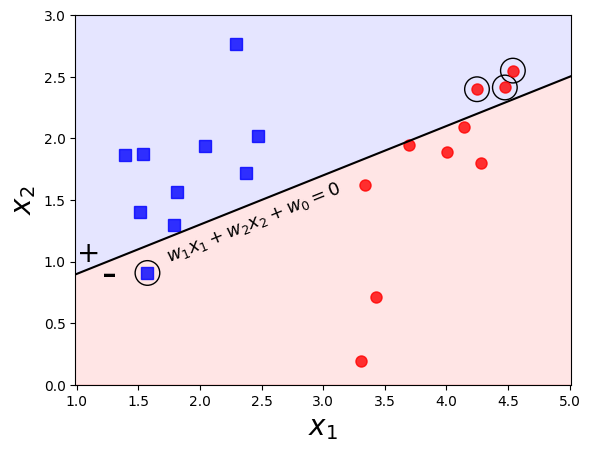

In [192]:
# plot points
fig, ax = plt.subplots()

plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
plt.axis('equal')
# axis limits
plt.ylim(0, 3)
plt.xlim(2, 4)

# fill region colors
x1 = np.arange(-10,10,0.1)
w1 = .4
w2 = -1
w0 = .5
y1 = w1 * x1 + w2 + 1.5
y2 = 10 * x1
plt.plot(x1, y1, 'k')
plt.fill_between(x1, y1, color='red', alpha=.1)
plt.fill_between(x1, y1, y2, color = 'blue', alpha=.1)

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)

plt.text(1, 1, r'+', fontsize=20)
plt.text(1.2, .8, r'-', fontsize=30)


# find misclassified points
M = []
for p in X0:
    if w1*p[0] + w2*p[1] + w0 > 0:
        M.append(p)
for p in X1:
    if w1*p[0] + w2*p[1] + w0 < 0:
        M.append(p)
# add circles around misclassified points
for m in M:
    circle = plt.Circle((m[0], m[1]), 0.1, color='k', fill=False) # 0.1 is the radius
    ax.add_artist(circle)

plt.text(1.7, 1, r'$w_1x_1 + w_2x_2 + w_0 = 0$', fontsize=13, rotation=22)
plt.show()

### Optimize the loss function

At one point, if we are only interested in points that are misclassified, then the function $J(\mathbf{w})$ is differentiable at all $\mathbf{w}$, so we can use gradient descent or stochastic gradient descent (SGD) to optimize this loss function. With the advantages of SGD for large-scale problems, we will follow this algorithm. For only one data point $\mathbf{x}_i$ with misclassification, the loss function and its derivative are respectively

$$J(\mathbf{w}; \mathbf{x}_i; y_i) = -y_i\mathbf{w}^T\mathbf{x_i} \ ; \ \nabla_{\mathbf{w}}J(\mathbf{w}; \mathbf{x}_i; y_i) = -y_i\mathbf{x}_i$$

The update rule $\mathbf{w}$ using SGD is

$$\mathbf{w}\leftarrow\mathbf{w} - \eta(-y_i\mathbf{x}_i) = \mathbf{w} + \eta y_i\mathbf{x}_i$$

where $\eta$ is the learning rate. In PLA, $\eta$ is chosen to be equal to $1$. We have a very neat update rule: $\mathbf{w}_{t+1} = \mathbf{w}_t + y_i\mathbf{x}_i$.

Next, we see that

$$\mathbf{w}_{t+1}\mathbf{x}_i = (\mathbf{w}_t + y_i\mathbf{x}_i)^T\mathbf{x}_i = \mathbf{w}_t^T\mathbf{x}_i + y_i||\mathbf{x}_i||_2^2$$

If $y_i = 1$, because $\mathbf{x}_i$ is misclassified, $\mathbf{w}_t^T\mathbf{x}_i < 0$. Also because $y_i = 1$, $y_i||\mathbf{x}_i||_2^2 = ||\mathbf{x}_i||_2^2\geq 1$ (note $\mathbf{x} _i$ is an extended feature vector with an element equal to 1 or $x_0 = 1$). From there, it follows that $\mathbf{w}_{t+1}\mathbf{x}_i > \mathbf{w}_t\mathbf{x}_i$. Explained in words, $\mathbf{w}_{t+1}$ moves towards making $\mathbf{x}_i$ correctly classified. The same thing happens with $y_i = -1$.

Note that this does not guarantee that the loss function over the entire data will be reduced, as it is possible that the new line will cause a previously correctly classified point to become an incorrectly classified point. However, this algorithm is guaranteed to converge after a finite number of steps. The perceptron algorithm is summarized below.

### Proof of convergence

Let $\mathbf{w}^*$ be a solution of the binary classification problem with two linearly separable classes (this solution always exists when the two classes are linearly separable). We will prove that the Perceptron Algorithm terminates after a finite number of steps by contradiction.

Then, we assume that there exists a solution $\mathbf{w}$ such that the Perceptron algorithm runs forever. First of all, we see that, for any $\alpha$, if $\mathbf{w}^*$ is a solution, $\alpha\mathbf{w}^*$ is also a solution to the problem (consider the submit $(1)$). Consider the non-negative sequence $u_{\alpha}(t) = ||\mathbf{w}_t - \alpha\mathbf{w}^*||_2^2$. According to the counterfactual hypothesis, there exists a point with a misclassification when using the solution $\mathbf{w}_t$ . Suppose it is point $\mathbf{x}_i$ with label $y_i$ . We have

$$
\begin{align*}
    u_{\alpha}(t + 1) &= ||\mathbf{w}_{t+1} - \alpha\mathbf{w}^*||_2^2\\
    &= ||\mathbf{w}_t - y_i\mathbf{x}_i - \alpha\mathbf{w}^*||_2^2\\
    &= ||\mathbf{w}_t - \alpha\mathbf{w}^*||_2^2 + y_i^2||\mathbf{x}_i||_2^2 + 2y_i\mathbf{x}_i^T(\mathbf{w}_t - \alpha\mathbf{w}^*)\\
    &< u_{\alpha}(t) + ||\mathbf{x}_i||_2^2 - 2\alpha y_i\mathbf{x}_i^T\mathbf{w}^* \tag{2}
\end{align*}
$$

The less than sign in the last line is because $y_i^2 = 1$ and $2y_i\mathbf{x}_i^T\mathbf{w}_t < 0$. If you continue to set

$$\beta = \max_{i=1, 2, \ldots, N}||\mathbf{x}_i||_2^2$$
$$\gamma = \min_{i=1, 2, \ldots, N}y_i\mathbf{x}_i^T\mathbf{w}^*$$

Choosing $\alpha = \frac{\beta}{\gamma}$, we have

$$0\leq u_{\alpha}(t + 1) < u_{\alpha}(t) + \beta - 2\alpha\gamma = u_{\alpha}(t) - \beta < u_{\alpha}(t)$$

We can choose this value because $(2)$ holds for any $\alpha$. This means: if there are always misclassified points, then the sequence $u_{\alpha}(t)$ is a decreasing sequence, bounded below by $0$, and the next element is at least poor than the previous element by an amount $\beta$.

This proves that at some point there will be no more points with classification errors, so $\mathbf{w}$ will not exist so that the Perceptron algorithm runs forever. In other words, the perceptron algorithm converges after a finite number of steps.

### Summary of the perceptron algorithm

1. At time $t = 0$, randomly select a coefficient vector $\mathbf{w}_0$.
2. At time $t$, randomly browse through each data point $\mathbf{x}_i$:
+ If $\mathbf{x}_i$ is correctly classified, that is $\text{sgn}(\mathbf{w}^T\mathbf{x}) = y_i$, we ignore it.
+ If $\mathbf{x}_i$ is misclassified, update $\mathbf{w}$
$$\mathbf{w}\leftarrow\mathbf{w} + y_i\mathbf{x}_i$$
3. Check to see how many points are misclassifed. If there are no points left, stop the algorithm. If so, go back to step 2.

## Example using Python

In [193]:
np.random.seed(2)

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T

X = np.concatenate((X0, X1), axis=1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis=1)
# Xbar 
X = np.concatenate((np.ones((1, 2*N)), X), axis=0)

In [194]:
print(X)

[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.        ]
 [2.22096057 2.70132234 3.08493823 2.02701417 2.73223639 1.21171968
  2.22920603 1.8637762  1.74682699 2.37191737 4.47403369 4.09281249
  4.22222334 4.58438569 4.74493118 3.6355797  5.19217738 3.51075436
  3.93784332 3.8787214 ]
 [2.19579728 3.43487375 2.70849736 1.47010441 2.32571583 2.23682627
  1.72925457 1.59716548 2.27230351 2.37595358 2.4040742  1.65061706
  2.11659863 2.05326933 2.67628604 2.63347726 3.2425902  2.11880111
  1.56029947 2.12126884]]


In [195]:
print(y)

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1.]]


In [196]:
print(f'X shape = {X.shape}\ny shape = {y.shape}')

X shape = (3, 20)
y shape = (1, 20)


In [197]:
# Check the sign
def h(w, x):
    return np.sign(np.dot(w.T, x))

def has_converged(X, y, w):
    return np.array_equal(h(w, X), y) # True if h(w, X) == y else False

def perceptron(X, y, w_init):
    w = [w_init]
    d = X.shape[0]
    N = X.shape[1]
    mis_points = []
    while True:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(d, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi*xi 

                w.append(w_new)
                
        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points)

d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X, y, w_init)
print(f'm = {m}')
print(f'w[-1] = \n{w[-1]}')
print(len(w))

m = [7, 10, 0, 18, 3, 6, 14, 9, 7, 17, 0, 19, 3, 2, 12, 6, 11, 7]
w[-1] = 
[[ 3.6864918 ]
 [-4.08776229]
 [ 4.1502239 ]]
19


MovieWriter imagemagick unavailable; using Pillow instead.


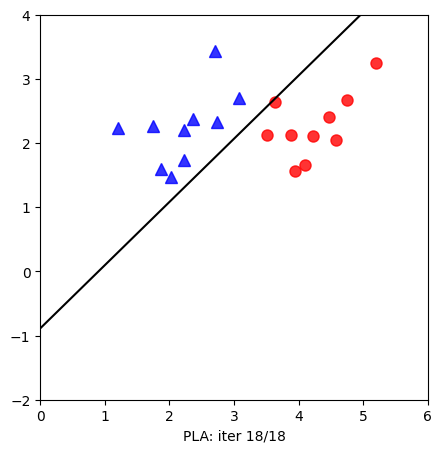

In [201]:
def draw_line(w):
    w0, w1, w2 = w[0], w[1], w[2]
    if w2 != 0:
        x11, x12 = -100, 100
        return plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')
    else:
        x10 = -w0/w1
        return plt.plot([x10, x10], [-100, 100], 'k')

## GD example
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

def viz_alg_1d_2(w):
    it = len(w)    
       
    fig, ax = plt.subplots(figsize=(5, 5))  
    
    def update(i):
        ani = plt.cla()
        #points
        ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8)
        ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8)
        ani = plt.axis([0 , 6, -2, 4])
        i2 =  i if i < it else it-1
        ani = draw_line(w[i2])
        if i < it-1:
            # print(X[1, m[i]], X[2, ])
            circle = plt.Circle((X[1, m[i]], X[2, m[i]]), 0.15, color='k', fill = False)
            ax.add_artist(circle)

        label = 'PLA: iter %d/%d' %(i2, it-1)
        ax.set_xlabel(label)
        return ani, ax 
        
    anim = FuncAnimation(fig, update, frames=np.arange(0, it + 2), interval=1000)
    anim.save('pla_vis.gif', dpi = 100, writer = 'imagemagick')
    plt.show()
    
# x = np.asarray(x)
viz_alg_1d_2(w)

___
## **References:**

$[1].$ *Vũ Hữu Tiệp. Machine Learning cơ bản, Chapter 13, 2018.*